In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gauss_newton import generate_data, sigmoidal, dsigmoidal, armijo

In [2]:
class NonlinearLeastSquares:
    def __init__(self, gamma):
        self.t, self.alpha = generate_data(gamma)

    def F(self, x):
        return sigmoidal(self.t * x[0] + x[1]) - self.alpha

    def J(self, x):
        J = np.array([dsigmoidal(self.t * x[0] + x[1]) * self.t,
                      dsigmoidal(self.t * x[0] + x[1])]).T
        return J

    def f(self, x):
        return self.F(x).dot(self.F(x)) / 2.g

    def df(self, x):
        return self.J(x).T.dot(self.F(x))

    def Bf(self, x):
        return self.J(x).T.dot(self.J(x))

    def plot(self, x):
        t_axis = np.linspace(-10, 10, 50)
        plt.scatter(self.t, self.alpha)
        plt.plot(t_axis, sigmoidal(t_axis * x[0] + x[1]))
        plt.show()

In [3]:
def minimize_gauss_newton(problem, x0, tol=1e-5, maxit=1000):

    x = np.array(x0)
    iterates = [x.copy()]
    distances = []

    for k in range(maxit):
        g = problem.df(x)
        delta_x = np.linalg.solve(problem.Bf(x), -g)
        alpha = armijo(problem.f, x, g, delta_x)
        x += alpha * delta_x
        iterates.append(x.copy())
        distance = np.linalg.norm(delta_x)
        distances.append(distance)

        if distance < tol:
            return {"x": x, "distances": distances, "iterations": k}

    print("Reached maximum number of iterations!")
    return {"x": x, "distances": distances, "iterations": k}

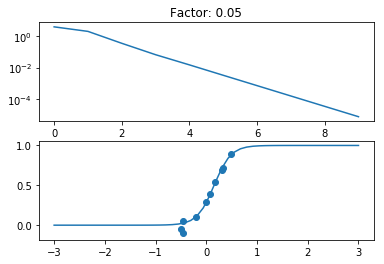

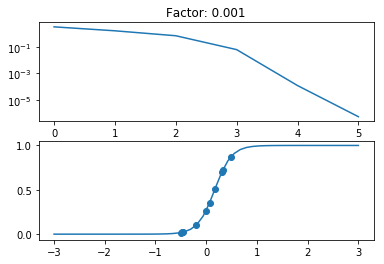

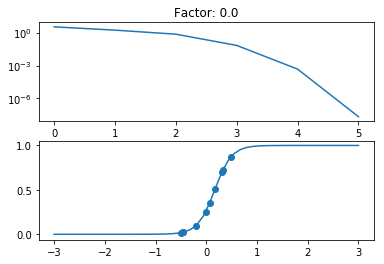

In [4]:
t_axis = np.linspace(-3, 3, 50)
    
for gamma in [.5e-1, 1e-3, 0.]:
    
    nlsq_problem = NonlinearLeastSquares(gamma)
    sol = minimize_gauss_newton(nlsq_problem, [0.1, 0.1])
    x = sol["x"]
    delta_x_list = sol["distances"]
    
    plt.subplot(211)
    plt.title("Factor: " + str(gamma))
    plt.plot(delta_x_list)
    plt.yscale("log")
    
    plt.subplot(212)
    plt.scatter(nlsq_problem.t, nlsq_problem.alpha)
    plt.plot(t_axis, sigmoidal(t_axis*x[0] + x[1]))
    plt.show()